In [2]:
import pandas as pd 
import math
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Q1
def findName(s):
  charList = set(s)
  if len(charList) >= 3:
    charTuple = sorted([(c, s.count(c)) for c in charList], key = lambda v: (-v[1], v[0])) 
    return pd.DataFrame(list(charTuple[:3]), columns = ["letter", "n_letter"])
  else:
    return None

#UAT
print(findName("GOOGLE"))
print(findName("statistics"))
print(findName("mississippi"))

inputStr = input("Please enter a string:")
print(findName(inputStr))

  letter  n_letter
0      G         2
1      O         2
2      E         1
  letter  n_letter
0      s         3
1      t         3
2      i         2
  letter  n_letter
0      i         4
1      s         4
2      p         2
Please enter a string:hellooooooooo
  letter  n_letter
0      o         9
1      l         2
2      e         1


In [11]:
#Q2
def isPefSq(n):
  sq = math.floor(math.sqrt(n))
  return sq * sq == n
def isFib(n):
  #According to wiki, fib number can be determined by: 5x^2 + 4 or 5x^2 - 4 is a perfect square: https://en.wikipedia.org/wiki/Fibonacci_number#Recognizing_Fibonacci_numbers
  return isPefSq(5 * (n ** 2) + 4) or isPefSq(5 * (n ** 2) - 4)

#UAT
print(isFib(317810))
print(isFib(317811))
print(isFib(317812))

inputFib = input("Please enter a number:")
try:
  print(isFib(int(inputFib)))
except:
  print("Error: Please input an integer")

False
True
False
Please enter a number:23456
False


In [ ]:
#Q3

#3.1
df_ath = pd.read_excel("/content/drive/My Drive/asg3_Q3_data/Athletes.xlsx")
df_coach = pd.read_excel("/content/drive/My Drive/asg3_Q3_data/Coaches.xlsx")
df_gender = pd.read_excel("/content/drive/My Drive/asg3_Q3_data/EntriesGender.xlsx")
df_medal = pd.read_excel("/content/drive/My Drive/asg3_Q3_data/Medals.xlsx")
df_team = pd.read_excel("/content/drive/My Drive/asg3_Q3_data/Teams.xlsx")

In [ ]:
#3.2
ath_x_coach = pd.merge(df_ath, df_coach, how="inner", left_on=["NOC", "Discipline"], right_on = ['NOC', "Discipline"], suffixes=("_ath", "_coach"))
sum_ath = ath_x_coach.groupby(["Name_coach", "NOC"]).agg(sum_ath=("Name_ath", "nunique")).sort_values(by = "sum_ath", ascending = False)[:5]
print("Top 5 cocaches leading most athletics: ")
print(sum_ath)

Top 5 cocaches leading most athletics: 
                              sum_ath
Name_coach         NOC               
ARNOLD Graham      Australia       43
GUSTAVSSON Tony    Australia       43
MATSUODANI Yasushi Japan           42
MORIYASU Hajime    Japan           42
TAKAKURA Asako     Japan           42


In [ ]:
#3.3
gender_discpl = df_gender.groupby(["Discipline"]).sum()
gender_discpl["Female_rate"] = (gender_discpl["Female"] / gender_discpl["Total"]) * 100
print("Top 5 Disciplines with highest female proportions: ")
print(gender_discpl.sort_values(by = "Female_rate", ascending = False)[:5])

Top 5 Disciplines with highest female proportions: 
                       Female  Male  Total  Female_rate
Discipline                                             
Artistic Swimming         105     0    105   100.000000
Rhythmic Gymnastics        96     0     96   100.000000
Cycling BMX Freestyle      10     9     19    52.631579
Diving                     72    71    143    50.349650
3x3 Basketball             32    32     64    50.000000


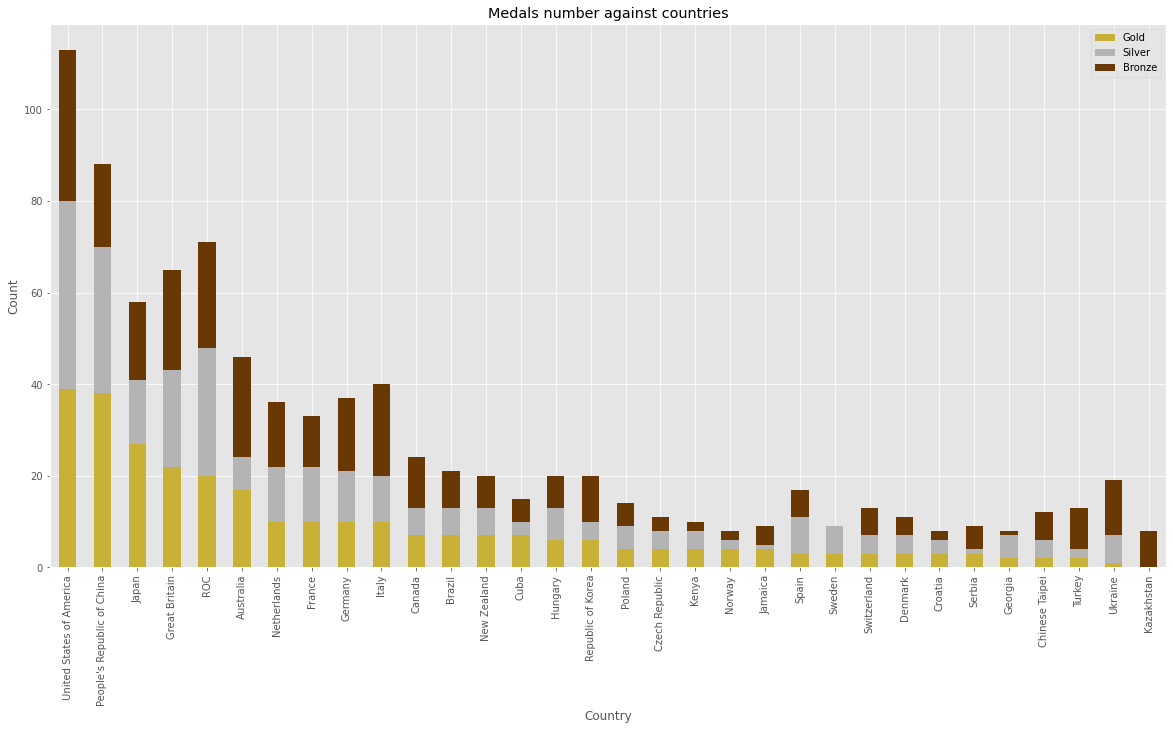

In [ ]:
#3.4
plt.style.use('ggplot')
medal_top30 = df_medal[df_medal["Rank by Total"] <= 30][["Team/NOC", "Gold", "Silver", "Bronze"]]
df_plot = medal_top30.plot(x='Team/NOC', kind='bar', stacked=True, figsize=(20,10), 
                 title="Medals number against countries", color = ["#C9B037", "#B4B4B4", "#6A3805"],
                 xlabel="Country", ylabel="Count", rot=90)

In [ ]:
#3.5
team_diff_nocName = df_team[df_team["NOC"] != df_team["Name"]]
unique_country = team_diff_nocName["NOC"].unique()
print(unique_country)
print("No. of countries that have different NOC and Name in Team.xlsx: ", len(unique_country))


["People's Republic of China" 'United States of America'
 'Republic of Moldova' 'Republic of Korea' 'Dominican Republic'
 'Trinidad and Tobago' 'Islamic Republic of Iran' 'Argentina' 'Australia'
 'Brazil' 'Canada' 'Chile' 'Cuba' 'Czech Republic' 'Germany' 'Italy'
 'Japan' 'Kenya' 'Latvia' 'Mexico' 'Morocco' 'Netherlands' 'Norway'
 'Poland' 'Qatar' 'ROC' 'Spain' 'Switzerland' "Côte d'Ivoire" 'Austria'
 'Chinese Taipei' 'Egypt' 'France' 'Hong Kong, China' 'Hungary' 'India'
 'Romania' 'Slovakia']
No. of countries that have different NOC and Name in Team.xlsx:  38
